# Assignment 7

### Learning Outcomes
This assignment introduces you to multiple regression analysis, model comparision between different multiple regression models and bootstrap for regression models. 
### Data set 
An investigator is interested in understanding the relationship, if any, between the analytical skills of young gifted children and the following variables: father’s IQ, mother’s IQ, age in month when the child first said ‘mummy’ or ‘daddy’, age in month when the child first counted to 10 successfully, average number of hours per week the child’s mother or father reads to the child, average number of hours per week the child watched an educational program on TV during the past three months, average number of hours per week the child watched cartoons on TV during the past three months. 

The analytical skills are evaluated using a standard testing procedure, and the score on this test is used as the response variable. Data were collected from schools in a large city on a set of thirty-six children who were identified as gifted children soon after they reached the age of four.
 
The data frame stored in gifted.csv contains the variables: 
- score:       Score in test of analytical skills.
- fatheriq:    Father’s IQ.
- motheriq:  Mother’s IQ.
- speak:       Age in months when the child first said ‘mummy’ or ‘daddy’.
- count:       Age in months when the child first counted to 10 successfully.
- read:         Average number of hours per week the child’s mother or father reads to the child.
- edutv:       Average number of hours per week the child watched an educational program on TV during the past three months.
- cartoons:  Average number of hours per week the child watched cartoons on TV during the past three months.


In [3]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.optimize as so
import pandas as pd 
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api as ss
import seaborn as sns

In [2]:
df = pd.read_csv('gifted.csv')

## Task 1: Implementing multiple regression ( / 28 pts)
### Question 1. ( / 6 pts)
Implement the function multRegPredict(b,D,xname). 
  - b is a list of parameter, with the first one being the intercept 
  - D is a DataFrame that contains the regressors
  - xname is a list of column names in D that will be added as regressors 

b needs to contain one more parameter (the intercept) than the numbers of regressors in xname. It will be helpful to start from the corresponding functions for polynomial regression. 

Then make a scatterplot of D.read and D.score 
Call your new function with yp = multRegPredict([134,11.8], D,['read']) and add predicted values to your plot (just call plt.scatter again – the dots will be added in a different color).  

The yp is: 0     156.42
1     163.50
2     159.96
3     154.06
4     159.96
5     156.42
6     155.24
7     161.14
8     158.78
9     158.78
10    159.96
11    161.14
12    159.96
13    154.06
14    155.24
15    157.60
16    161.14
17    159.96
18    159.96
19    157.60
20    162.32
21    158.78
22    161.14
23    161.14
24    161.14
25    161.14
26    162.32
27    162.32
28    155.24
29    158.78
30    157.60
31    159.96
32    158.78
33    158.78
34    161.14
35    159.96
Name: read, dtype: float64


<AxesSubplot:xlabel='read', ylabel='score'>

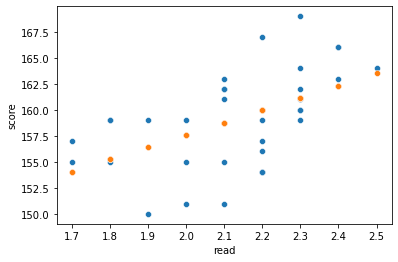

In [146]:
def multRegPredict(b, data, xname):
    yp = b[0] * np.ones((len(df.index)))
    
    for i in range(len(xname)):
        yp += b[i + 1] * df[xname[i]]
    return yp

#Function testing
yp = multRegPredict([134, 11.8], df, ['read'])
print(f'The yp is: {yp}')
sns.scatterplot(x = df['read'], y = df['score'])
sns.scatterplot(x = df['read'], y = yp)

Figure 1: Scatter plot of D.read and D.score with both the normal and predicted values (predicted is orange)

### Question 2. ( / 10 pts)
Implement the function multRegLossRSS(b,D,y,xname). y is a list or np-array for the response variable. The function should get the predictions from multRegPredict, and then calculate the residual sum-of-squares, and the derivative of the loss function in respect to each parameter. Test the function by calling multRegLossRSS([134,11.8],D,D.score,['read']). Report the resulting RSS for the regression of score (response variable) against read (explanatory variable)- as well as the derivatives for each parameter. Written answer: From the value of the derivative, do you have to increase or decrease the slope parameter to get a better fit?

In [26]:
def multRegLossRSS(b, data, y, xname):
    yPred = multRegPredict(b, data, xname)
    res = y - yPred
    rss = sum(res ** 2)
    
    grad = np.zeros((len(xname) + 1))
    grad[0] = -2 * sum(res)
    
    for i in range(len(xname)):
        x = df[xname[i]]
        grad[i + 1] = -2 * (sum(x * res))
    return (rss, grad)

#Function testing
rss, grad = multRegLossRSS([134, 11.8], df, df['score'], ['read'])
print(f'The RSS value is {rss} and the derivative is {grad}' )

The RSS value is 543.5100000000003 and the derivative is [ 4.84 10.3 ]


Written Answer: From the resulting derivative, we would most likely have to decrease the slope parameter in both cases

### Question 3 ( / 12 pts)
Implement the function multRegFit(D,y,xname), which uses so.minimize and multRegLossRSS to estimate the parameter values, and then calls multRegLossRSS again to calculate the R2 of the fit. The function should then return the R2 values and regression coefficients b. Use this print on the screen the R2-values for the models:

- y = b0  (hint, set xname = [])
- y = b0 + b1 \* read 
- y = b0 + b1 \* motheriq 
- y = b0 + b1 \* motheriq + b2 \* read

Which model has the highest R2? How do you interpret these results? How much of the variance of the response variable is uniquely explained by reading, how much by motheriq? Do the two variables explain each other away, explain independent parts of the variance, or show suppression? 

In [118]:
def multRegFit(data, y, xname):
    b0 = np.zeros(len(xname) + 1)
    RES = so.minimize(multRegLossRSS, b0, args = (data, y, xname), jac = True)
    b = RES.x
    
    res = y - np.mean(y)
    TSS = sum(res ** 2)
    RSS, grad = multRegLossRSS(b, data, y, xname)
    R2 = 1 - (RSS / TSS)
    return (R2, b)

#Function testing
R2_y1, b0 = multRegFit(df, df['score'], [])
R2_y2, b1 = multRegFit(df, df['score'], ['read'])
R2_y3, b2 = multRegFit(df, df['score'], ['motheriq'])
R2_y4, b3 = multRegFit(df, df['score'], ['motheriq', 'read'])

print(f'The y1 value is: {R2_y1}')
print(f'The y2 value is: {R2_y2}')
print(f'The y3 value is: {R2_y3}')
print(f'The y4 value is: {R2_y4}')

The y1 value is: 3.3306690738754696e-16
The y2 value is: 0.2758322729769078
The y3 value is: 0.3263173772377883
The y4 value is: 0.6291342380411358


Written Answer: The model that has the highest R2 is model 4.  The two variables do not explain each other away as they both have a similar influence on score and due to the large increase in R2 of the combined model, there is most likely some suppression between the variables.

## Task 2: Do crossvalidation on these models  ( / 32 pts)
### Question 1 ( / 12 pts)
Modify the leaveOneOutCV function, so it works on a data frame with the multiple regression analysis. The inputs to the function are:  

def leaveOneOutCV(D,y,args=(),fitfcn=multRegFit,predictfcn=multRegPredict):
 - D: Data Frame with explanatory variables 
 - y: A list or np-array of the response variable
 - args: Input arguments for the fitfcn and predict function (xname) 
 - fitfcn: Function for fitting called as fitfcn(D,y,args)
 - predictfcn: Function for prediction called as predictfcn(D,y,args)


In [166]:
def leaveOneOutCV(data, y, args = (), fitfunc = multRegFit, predictfunc = multRegPredict):
    N = len(df.index) #Number of observations 
    
    for i in range(N):
        df_train = df.iloc[df.index != i]
        df_test = df.iloc[df.index == i]
        r,b = fitfunc(df_train, df_train['score'], args)
        yp = predictfunc(b, df_test, args)
    
    TSS  = sum((y - y.mean()) ** 2)
    RSScv = sum((y - yp) ** 2) #had an issue with this number being very large and always the same
    R2cv = 1 - (RSScv / TSS)
    r,b=fitfunc(data, y, args)
    yf=predictfunc(b, data, args)
    RSS = sum((y - yf) ** 2)
    R2 = 1 - (RSS / TSS)
    return R2cv,R2

### Question 2 ( / 8 pts)
Call the function to get the cross-validated R2 for the 4 models specified in Task 1, Question 3. How to you interpret these results? Is there evidence that reading increases the analytic score over and above what the IQ of the mother does? 

In [167]:
#R2cv1, R21 = leaveOneOutCV(df, df['score'], []) - Bug with this one not having the right shape to broadcast?
R2cv2, R22 = leaveOneOutCV(df, df['score'], ['read'])
R2cv3, R23 = leaveOneOutCV(df, df['score'], ['motheriq'])
R2cv4, R24 = leaveOneOutCV(df, df['score'], ['motheriq', 'read'])
#print(f'MODEL 1: The R2cv value is {R2cv1} and the R2 value is {R21}')
print(f'MODEL 2: The R2cv value is {R2cv2} and the R2 value is {R22}')
print(f'MODEL 3: The R2cv value is {R2cv3} and the R2 value is {R23}')
print(f'MODEL 4: The R2cv value is {R2cv4} and the R2 value is {R24}')

MODEL 2: The R2cv value is -1215.1138795305612 and the R2 value is 0.2758322729769078
MODEL 3: The R2cv value is -1215.1138795305612 and the R2 value is 0.3263173772377883
MODEL 4: The R2cv value is -1215.1138795305612 and the R2 value is 0.6291342380411358


Written Answer: There is evidence that reading increases analytic score over the IQ of what the mother does.

### Question 3 ( / 4 pts)
Add the variable fatheriq to the model containing read and motheriq. Is there evidence that the IQ of the father improves the prediction over and above what hours reading and mother IQ can predict? 

In [103]:
R2cv, R2 = leaveOneOutCV(df, df['score'], ['motheriq', 'fatheriq', 'read'])
print(f'The R2cv value is {R2cv} and the R2 value is {R2}')

The R2cv value is -1215.1138795305612 and the R2 value is 0.6872499977248241


Written Answer: There is also evidence that the IQ of the father improves prediction above the hours of reading and mother IQ can.

### Question 4 ( / 8 pts)
Is edutv (hours of educational TV) alone a reliable predictor of the analytic score? Does it add prediction power over and above from what the model motheriq + read + fatheriq can predict? 


In [105]:
R2cv, R2 = leaveOneOutCV(df, df['score'], ['edutv'])
print(f'The R2cv value is {R2cv} and the R2 value is {R2}')
R2cv_5, R2_5 = leaveOneOutCV(df, df['score'], ['edutv', 'motheriq', 'fatheriq', 'read'])
print(f'The R2cv value is {R2cv_5} and the R2 value is {R2_5}')

The R2cv value is -1215.1138795305612 and the R2 value is 0.13709229573136816
The R2cv value is -1215.1138795305612 and the R2 value is 0.7002993395259488


Written Answer: No edutv alone is not a good predictor of analytic score however it does slightly help combined with fatheriq, motheriq and reading.

## Task 3: Bootstrap for multiple regression. ( / 40 pts)
### Question 1 ( / 14 pts)
Implement bootstrap for linear regression. Start from the function bootstrap. The function should have input parameters
def bootstrapReg(D,y,args,fitfcn,numIter=500):
and should return a numIter x numParams np.array of bootstrap estimates.  
numParams is the length of b-vector returned from the fitfcn (in our case multiRegFit). That is, each column of the array should be the boostrap estimates for one of the regression coefficients. 

Run the bootstrap on the data set in gifted.csv. Run the bootstrap on a simple regression model that explains ‘score’ from the explanatory variable ‘edutv’ alone. Report the CI for edutv -slope. Does the CI include zero- i.e. is the relationship between edutv and score significant? Which direction is the association between the two variables? 

In [163]:
def confidenceInt(data,perc):
    tail = (100-perc)/2 # Weight on each tail  
    Int=(np.percentile(data,tail),np.percentile(data,100-tail))
    return Int

def bootstrapReg(data, y, args, fitfunc = multRegFit, numIter = 500):
    R2_0, b0 = fitfunc(data, y, args)
    numParam = len(b0)
    N = len(df.index)
    indArray = np.arange(N)
    stats = np.zeros([numIter, numParam])
    
    for i in range(numIter):
        samp = np.random.choice(indArray, N, replace = True)
        sampDf = df.iloc[samp]
        R2, b = fitfunc(sampDf, y, args)
        stats[i, :] = b
    
    return stats
        
#Function testing
stats1 = bootstrapReg(df, df['score'], ['edutv'], multRegFit)
cI_1 = confidenceInt(stats1, 95)
print(f'The confidence interval is: {cI_1}')

The confidence interval is: (-3.0666666506167752, 165.14444440252257)


Written Answer: The CI does include zero in this case and there is not a significant relationship between score and edutv alone.

### Question 2 ( / 8 pts)
Run the bootstrap on the model that explains score as a function of hours of cartoons watched. Is there a significant relationship between ‘cartoons’ and ‘score’? 

In [161]:
stats2 = bootstrapReg(df, df['score'], ['cartoons'], multRegFit)
cI_2 = confidenceInt(stats2, 95)
print(f'The confidence interval is: {cI_2}')

The confidence interval is: (1.8074745654714108, 153.60349801957284)


Written Answer: There is a more significant relationship between cartoons and score than edutv however it is still not that significant.

### Question 3 ( / 8 pts)
Run the bootstrap on a model that explains score as a function of edutv and cartoons. Report the CIs for both variabless. Do the conclusion from Question 1 and 2 change? Have the CIs become smaller or larger as compared to the simple regression models from Question 1 and 2?

In [129]:
stats3 = bootstrapReg(df, df['score'], ['cartoons', 'edutv'], multRegFit)
cI_3 = confidenceInt(stats3, 95)
print(f'The confidence interval is: {cI_3}')

The confidence interval is: (-8.094685650680333, 189.83783519852872)


Written Answer: No, the conclusions do not change from questions 1 and 2 as the CI's have become more extreme in both sides of the interval from those questions.

### Question 4 ( / 10 pts)
Plot the bootstrap estimates for edutv and cartoons from Question 3 against each other in a scatter plot. Are they positively or negatively related? What does this mean for the relationship between the regressors?

In [123]:
sns.scatterplot(stats1) #Bug with trying to plot the two
sns.scatterplot(stats2) #Bug with trying to plot the two

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

Written Answer: The two bootstrap estimates are positively related which means that the relationship is a positive correlation between the regressors. (Based on the earlier data since plotting had issues)